In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/human-stress-prediction/Stress.csv


In [2]:
import numpy as np 
import pandas as pd 

Human_Stress_Data= pd.read_csv('/kaggle/input/human-stress-prediction/Stress.csv')
Human_Stress_Data.head()

,subreddit,post_id,sentence_range,text,label,confidence,social_timestamp
0,ptsd,8601tu,"(15, 20)","He said he had not felt that way before, sugge...",1,0.8,1521614353
1,assistance,8lbrx9,"(0, 5)","Hey there r/assistance, Not sure if this is th...",0,1.0,1527009817
2,ptsd,9ch1zh,"(15, 20)",My mom then hit me with the newspaper and it s...,1,0.8,1535935605
3,relationships,7rorpp,"[5, 10]","until i met my new boyfriend, he is amazing, h...",1,0.6,1516429555
4,survivorsofabuse,9p2gbc,"[0, 5]",October is Domestic Violence Awareness Month a...,1,0.8,1539809005


In [3]:
print('Before deleting duplicate data',Human_Stress_Data.shape)
Human_Stress_Data= Human_Stress_Data.drop_duplicates()
print('After deleting duplicate data', Human_Stress_Data.shape)

Before deleting duplicate data (2838, 7)
After deleting duplicate data (2838, 7)


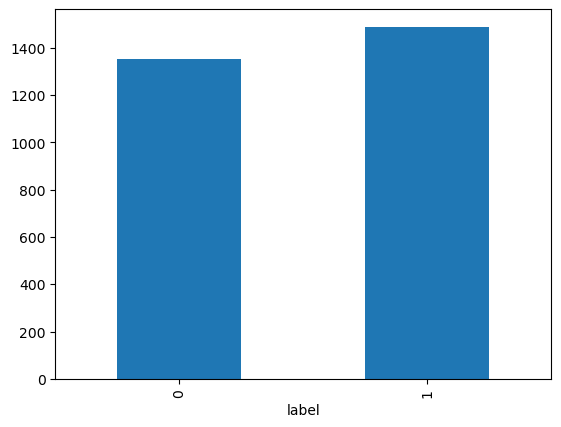

In [4]:
Plot_data= Human_Stress_Data.groupby('label').size().plot(kind= 'bar')

In [5]:
Human_Stress_Data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2838 entries, 0 to 2837
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   subreddit         2838 non-null   object 
 1   post_id           2838 non-null   object 
 2   sentence_range    2838 non-null   object 
 3   text              2838 non-null   object 
 4   label             2838 non-null   int64  
 5   confidence        2838 non-null   float64
 6   social_timestamp  2838 non-null   int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 177.4+ KB


In [6]:
Human_Stress_Data.describe()

,label,confidence,social_timestamp
count,2838.000000,2838.000000,2.838000e+03
mean,0.524313,0.808972,1.518107e+09
std,0.499497,0.177038,1.552209e+07
min,0.000000,0.428571,1.483274e+09
25%,0.000000,0.600000,1.509698e+09
50%,1.000000,0.800000,1.517066e+09
75%,1.000000,1.000000,1.530898e+09
max,1.000000,1.000000,1.542592e+09


In [7]:
Human_Stress_Data.nunique()

subreddit             10
post_id             2343
sentence_range       173
text                2820
label                  2
confidence            10
social_timestamp    2343
dtype: int64

<AxesSubplot:xlabel='confidence'>

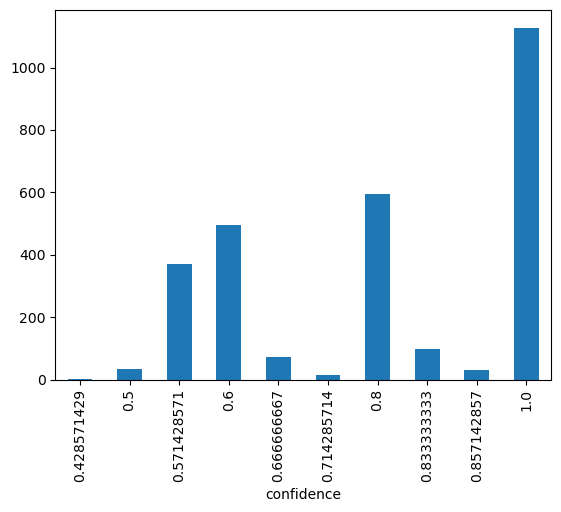

In [8]:
Human_Stress_Data.groupby('confidence').size().plot(kind='bar')

<AxesSubplot:xlabel='subreddit'>

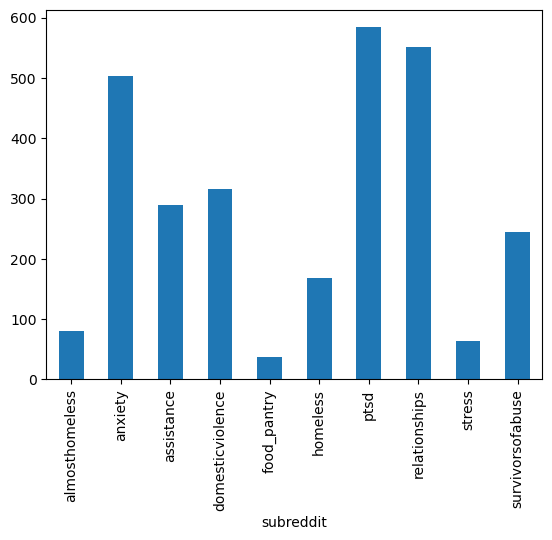

In [9]:
Human_Stress_Data.groupby('subreddit').size().plot(kind='bar')

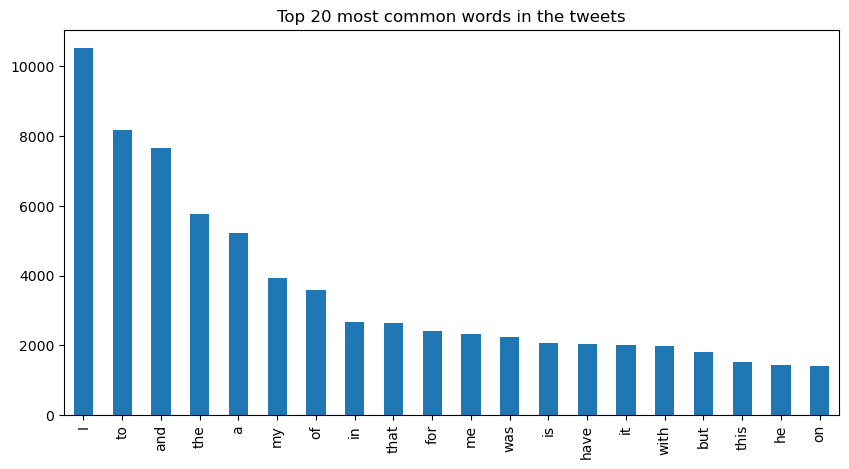

In [10]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

# Word frequency analysis
all_words = ' '.join(Human_Stress_Data['text'])
all_words = all_words.split()

freq = pd.Series(all_words).value_counts()
freq[:20].plot(kind='bar', title='Top 20 most common words in the tweets', figsize=(10,5))
plt.show()

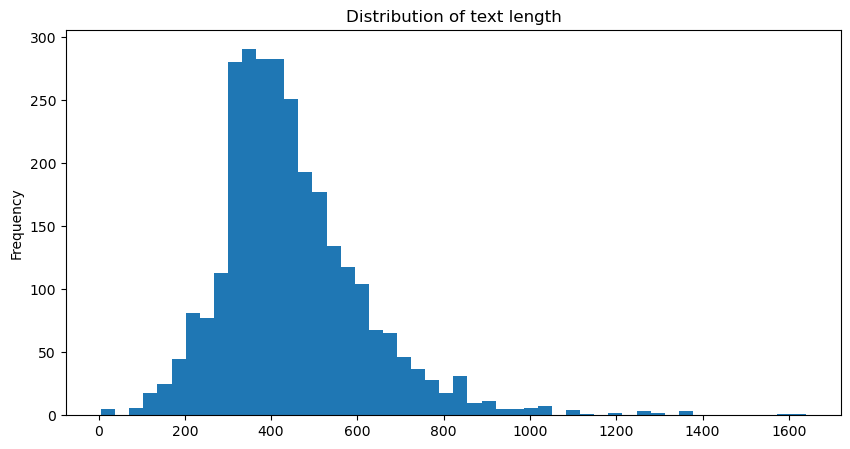

In [11]:
Human_Stress_Data['text_length']= Human_Stress_Data['text'].apply(len)
Human_Stress_Data['text_length'].plot(kind='hist', title= 'Distribution of text length', 
                                      bins= 50,figsize= (10,5))
plt.show()

In [12]:
def clean(data_frame):
    # Variable to replace all characters that are not letters or whitespace
    regex = re.compile('[^a-z\s]')
    
    # Convert text to lower case
    data_frame['clean_text'] = data_frame['text'].str.lower()
    # Removes all characters that are not letters or spaces
    data_frame['clean_text'] = data_frame['clean_text'].apply(lambda x: regex.sub('', x))
    # Removes all characters between square brackets.
    data_frame['clean_text'] = data_frame['clean_text'].str.replace('[%s]', '', regex = True)
    # Remove the accents
    data_frame['clean_text'] = data_frame['clean_text'].apply(lambda x: regex.sub('', unidecode(x)))
    # Remove http
    data_frame['clean_text'] = data_frame['clean_text'].str.replace('http', '', regex = True)

In [13]:
Human_Stress_Data['clean_text']= Human_Stress_Data['text'].str.lower()
Human_Stress_Data['clean_text'].head()

0    he said he had not felt that way before, sugge...
1    hey there r/assistance, not sure if this is th...
2    my mom then hit me with the newspaper and it s...
3    until i met my new boyfriend, he is amazing, h...
4    october is domestic violence awareness month a...
Name: clean_text, dtype: object

In [14]:
import re
regex= re.compile('[^a-z\s]')
Human_Stress_Data['clean_text'] = Human_Stress_Data['clean_text'].apply(lambda x: regex.sub('', x))
Human_Stress_Data['clean_text'].head(10)


0    he said he had not felt that way before sugget...
1    hey there rassistance not sure if this is the ...
2    my mom then hit me with the newspaper and it s...
3    until i met my new boyfriend he is amazing he ...
4    october is domestic violence awareness month a...
5    i think he doesnt want to put in the effort fo...
6    it was a big company so luckily i didnt have t...
7      it cleared up and i was okay but on monday i...
8    i actually give an assistant half my emergency...
9    i just feel like the street life has fucked my...
Name: clean_text, dtype: object

In [15]:
Human_Stress_Data['clean_text'] = Human_Stress_Data['clean_text'].str.replace('http', '', regex = True)

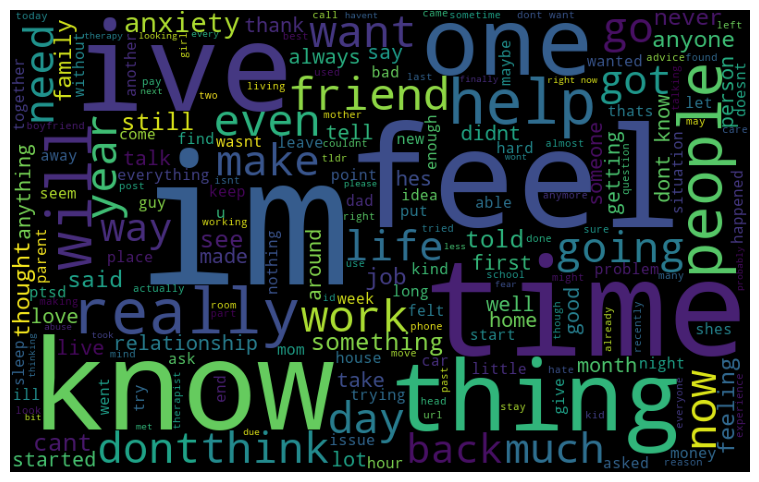

In [16]:
# Concatenating all cleaned texts into a single string
from wordcloud import WordCloud
text = ' '.join(capt for capt in Human_Stress_Data['clean_text'])
wordcloud = WordCloud(width = 800, height = 500, background_color = 'black', min_font_size = 10).generate(text) 
plt.figure(figsize = (10, 6), facecolor = None) 
plt.imshow(wordcloud)   
plt.axis('off') 
plt.show();

In [17]:
Human_Stress_Data.clean_text[0]

'he said he had not felt that way before suggeted i go rest and so trigger ahead if youire a hypocondriac like me i decide to look up feelings of doom in hopes of maybe getting sucked into some rabbit hole of ludicrous conspiracy a stupid are you psychic test or new age bs something i could even laugh at down the road no i ended up reading that this sense of doom can be indicative of various health ailments one of which i am prone to so on top of my doom to my gloomi am now fn worried about my heart i do happen to have a physical in  hours'